In [50]:
import random
import math
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_boston
from datetime import datetime
from datetime import timedelta
%matplotlib inline
# plt.matplotlib.rcParams.update({'font.size': 50})
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'   
plt.rcParams["patch.force_edgecolor"] = False
plt.rc('figure', titlesize=25)

In [51]:
conf_data = pd.read_csv('../augmented_datasets/tableau_conf_data.csv')
death_data = pd.read_csv('../augmented_datasets/tableau_death_data.csv')

###### CORRELATIONS AND SCATTER PLOTS AVG TMP VS MAX CASES CONFIRMED AND DEATHS
Note that as the precipitation data is not relaible it is discarded


Death cases max_cases correaltion Pearson
Cases            0.999995
Difference       0.854931
avg_wind         0.074313
Long             0.067427
Lat              0.063744
growth_factor    0.030954
avg_RH           0.026782
Unnamed: 0       0.019409
avg_tmp         -0.000570
avg_m_RH        -0.014980
avg_m_tmp       -0.019967
avg_precip      -0.033760
avg_m_wind      -0.053240
avg_m_precip    -0.060771
dtype: float64

Death cases max_cases correaltion Spearman
Cases            0.912620
growth_factor    0.667735
Difference       0.609644
Lat              0.208153
avg_m_RH         0.080111
Long             0.048278
Unnamed: 0       0.015495
avg_precip      -0.026353
avg_m_wind      -0.029692
avg_wind        -0.049419
avg_RH          -0.066142
avg_m_precip    -0.082325
avg_tmp         -0.164779
avg_m_tmp       -0.169469
dtype: float64

Confirmed cases max_cases correaltion Pearson
Cases            0.999954
Difference       0.696918
Long             0.104040
Unnamed: 0       0.088213
Lat 

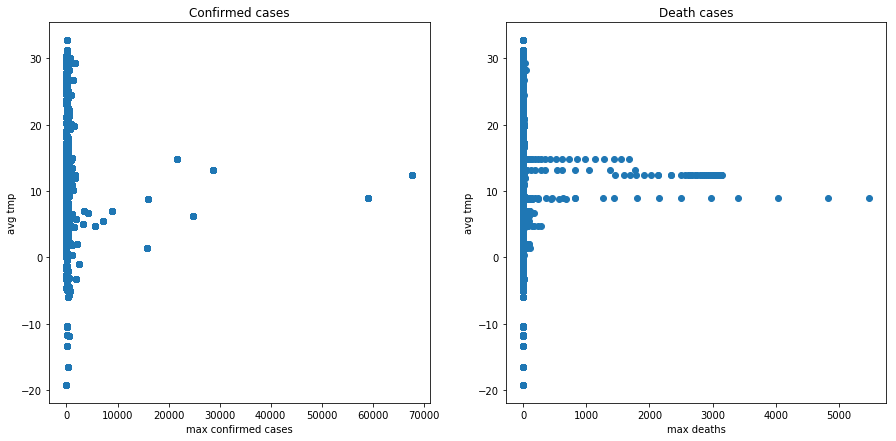

In [52]:
TMP_RATE = 1
deaths = death_data[death_data['Date'] == '3/22/2020'][death_data['max_cases'].astype(int) > 0]
confs = conf_data[conf_data['Date'] == '3/22/2020'][conf_data['max_cases'].astype(int) > 0]

deaths['avg_m_tmp'] = deaths['avg_m_tmp'] * TMP_RATE
confs['avg_m_tmp'] = confs['avg_m_tmp'] * TMP_RATE

death_corrs = deaths.corr().unstack().sort_values(kind="quicksort", ascending=False)
death_corrs = death_corrs[death_corrs != 1]
_ = death_corrs.drop_duplicates()
print('\nDeath cases max_cases correaltion Pearson')
print(death_corrs['max_cases'])

death_corrs = deaths.corr('spearman').unstack().sort_values(kind="quicksort", ascending=False)
death_corrs = death_corrs[death_corrs != 1]
_ = death_corrs.drop_duplicates()
print('\nDeath cases max_cases correaltion Spearman')
print(death_corrs['max_cases'])

conf_corrs = confs.corr().unstack().sort_values(kind="quicksort", ascending=False)
conf_corrs = conf_corrs[conf_corrs != 1]
_ = conf_corrs.drop_duplicates()
print('\nConfirmed cases max_cases correaltion Pearson')
print(conf_corrs['max_cases'])

conf_corrs = confs.corr('spearman').unstack().sort_values(kind="quicksort", ascending=False)
conf_corrs = conf_corrs[conf_corrs != 1]
_ = conf_corrs.drop_duplicates()
print('\nConfirmed cases max_cases correaltion Spearman')
print(conf_corrs['max_cases'])

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
_ = axes[0].scatter(conf_data['max_cases'], conf_data['avg_m_tmp'])
_ = axes[1].scatter(death_data['Cases'], death_data['avg_m_tmp'])
_ = axes[0].set_xlabel('max confirmed cases')
_ = axes[0].set_ylabel('avg tmp')
_ = axes[0].set_title('Confirmed cases')
_ = axes[1].set_xlabel('max deaths')
_ = axes[1].set_ylabel('avg tmp')
_ = axes[1].set_title('Death cases')

We take the interasting correlations and compute their p-values:

In [53]:
corr_ = stats.pearsonr(confs['max_cases'], confs['avg_m_tmp'])
print('Confirmed cases max_cases vs avg_m_tmp correaltion Pearson: {0}, p-value: {1}'.format(corr_[0], corr_[1]))

corr_ = stats.spearmanr(confs['max_cases'], confs['avg_m_tmp'])
print('Confirmed cases max_cases vs avg_m_tmp correaltion Spearman: {0}, p-value: {1}'.format(corr_[0], corr_[1]))

Confirmed cases max_cases vs avg_m_tmp correaltion Pearson: -0.040973440447374956, p-value: 0.42948804586549694
Confirmed cases max_cases vs avg_m_tmp correaltion Spearman: -0.07967929410096322, p-value: 0.12399662751772648


###### Non perfect correlations between max_cases and cases result from instances where the amount of cases on the 23.3 was smaller then the maximal, as shown on the next block

In [ ]:
test = confs.drop(confs[confs['Cases'] < confs['max_cases']].index)
test_corrs = test.corr().unstack().sort_values(kind="quicksort", ascending=False)
# test_corrs = test_corrs[test_corrs != 1]
_ = test_corrs.drop_duplicates()
print('\nDeath cases max_cases correaltion Pearson')
print(test_corrs['max_cases'])

###### CORRELATIONS AND SCATTER PLOTS AVG TMP VS GROWTH FACTOR CONFIRMED AND DEATHS #


Confirmed cases growth_rate correaltion Pearson
avg_m_precip        0.297637
avg_precip          0.130394
avg_RH              0.098053
avg_interval_RH     0.068870
avg_m_RH            0.029771
avg_interval_tmp    0.013423
avg_m_wind         -0.005156
avg_m_tmp          -0.012796
Lat                -0.026151
Unnamed: 0         -0.033470
avg_wind           -0.039720
Cases              -0.075358
max_cases          -0.075795
avg_tmp            -0.118059
Long               -0.404631
dtype: float64

Confirmed cases growth_rate correaltion Spearman
avg_m_precip        0.346413
avg_precip          0.254514
Cases               0.098864
max_cases           0.090571
avg_RH              0.087269
avg_interval_RH     0.054215
Lat                 0.028086
avg_m_wind          0.019723
avg_interval_tmp   -0.004259
Unnamed: 0         -0.004550
avg_wind           -0.008663
avg_m_RH           -0.013192
avg_m_tmp          -0.040365
avg_tmp            -0.139438
Long               -0.455052
dtype: float64



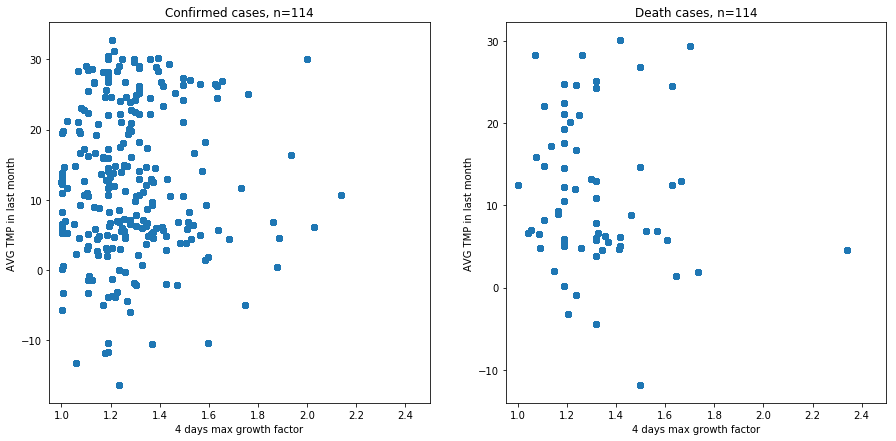

In [189]:
TMP_RATE = 1
confs = conf_data[conf_data['Date'] == '3/22/2020'][conf_data['Cases'].astype(int) > 0]
deaths = death_data[death_data['Date'] == '3/22/2020'][death_data['max_cases'].astype(int) > 0]
confs['avg_m_tmp'] = confs['avg_m_tmp'] * TMP_RATE
deaths['avg_m_tmp'] = deaths['avg_m_tmp'] * TMP_RATE

conf_corrs_p = confs.corr().unstack().sort_values(kind="quicksort", ascending=False)
conf_corrs_p = conf_corrs_p[conf_corrs_p != 1]
_ = conf_corrs_p.drop_duplicates()
print('\nConfirmed cases growth_rate correaltion Pearson')
print(conf_corrs_p['growth_factor'])

conf_corrs_s = confs.corr('spearman').unstack().sort_values(kind="quicksort", ascending=False)
conf_corrs_s = conf_corrs_s[conf_corrs_s != 1]
_ = conf_corrs_s.drop_duplicates()
print('\nConfirmed cases growth_rate correaltion Spearman')
print(conf_corrs_s['growth_factor'])

death_corrs_p = deaths.corr().unstack().sort_values(kind="quicksort", ascending=False)
death_corrs_p = death_corrs_p[death_corrs_p != 1]
_ = death_corrs_p.drop_duplicates()
print('\nDeath cases growth_rate correaltion Pearson')
print(death_corrs_p['growth_factor'])

death_corrs_s = deaths.corr('spearman').unstack().sort_values(kind="quicksort", ascending=False)
death_corrs_s = death_corrs_s[death_corrs_s != 1]
_ = death_corrs_s.drop_duplicates()
print('\nDeath cases growth_rate correaltion Spearman')
print(death_corrs_s['growth_factor'])

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
_ = axes[0].scatter(conf_data[conf_data['growth_factor'].astype(float) > 1.0]['growth_factor'],\
                    conf_data[conf_data['growth_factor'].astype(float) > 1.0]['avg_m_tmp'])

_ = axes[1].scatter(death_data[death_data['growth_factor'].astype(float) > 1.0]['growth_factor'],\
                    death_data[death_data['growth_factor'].astype(float) > 1.0]['avg_m_tmp'])

n = len(conf_data[conf_data['growth_factor'].astype(int) > 1])

_ = axes[0].set_xlim(0.95, 2.5)
_ = axes[1].set_xlim(0.95, 2.5)
_ = axes[0].set_xlabel('4 days max growth factor')
_ = axes[0].set_ylabel('AVG TMP in last month')
_ = axes[0].set_title('Confirmed cases, n={0}'.format(n))
_ = axes[1].set_xlabel('4 days max growth factor')
_ = axes[1].set_ylabel('AVG TMP in last month')
_ = axes[1].set_title('Death cases, n={0}'.format(n))

Significant correlations with p-values:

In [ ]:
corr_ = stats.pearsonr(confs['growth_factor'], confs['avg_m_tmp'])
print('Confirmed cases growth_factor vs avg_m_tmp correaltion Pearson: {0}, p-value: {1}'.format(corr_[0], corr_[1]))

corr_ = stats.spearmanr(confs['growth_factor'], confs['avg_m_tmp'])
print('Confirmed cases growth_factor vs avg_m_tmp correaltion Spearman: {0}, p-value: {1}'.format(corr_[0], corr_[1]))

corr_ = stats.pearsonr(confs['growth_factor'], confs['avg_tmp'])
print('Confirmed cases growth_factor vs avg_tmp correaltion Pearson: {0}, p-value: {1}'.format(corr_[0], corr_[1]))

corr_ = stats.spearmanr(confs['growth_factor'], confs['avg_tmp'])
print('Confirmed cases growth_factor vs avg_tmp correaltion Spearman: {0}, p-value: {1}'.format(corr_[0], corr_[1]))

corr_ = stats.pearsonr(deaths['growth_factor'], deaths['avg_m_tmp'])
print('Death cases growth_factor vs avg_m_tmp correaltion Pearson: {0}, p-value: {1}'.format(corr_[0], corr_[1]))

corr_ = stats.spearmanr(deaths['growth_factor'], deaths['avg_m_tmp'])
print('Death cases growth_factor vs avg_m_tmp correaltion Spearman: {0}, p-value: {1}'.format(corr_[0], corr_[1]))

corr_ = stats.pearsonr(deaths['growth_factor'], deaths['avg_tmp'])
print('Death cases growth_factor vs avg_tmp correaltion Pearson: {0}, p-value: {1}'.format(corr_[0], corr_[1]))

corr_ = stats.spearmanr(deaths['growth_factor'], deaths['avg_tmp'])
print('Death cases growth_factor vs avg_tmp correaltion Spearman: {0}, p-value: {1}'.format(corr_[0], corr_[1]))

###### Calculating the 5%-max interval and it's avg climate

In [81]:
conf_data['5% date'] = ''
conf_data['avg_interval_tmp'] = np.nan
conf_data['avg_interval_RH'] = np.nan
coords = conf_data.groupby(['Lat', 'Long']).size().index.tolist()

In [166]:
for coord in coords:
    lat = coord[0]
    long = coord[1]
    max_cases = int(conf_data.loc[conf_data['Lat'] == lat]\
                         .loc[conf_data['Long'] == long]['max_cases'].values[0])
    if not pd.notna(max_cases):
        continue
    five_prcnt = int(0.05 * max_cases)
    
    five_prcnt_date = conf_data.loc[conf_data['Lat'] == lat]\
                            .loc[conf_data['Long'] == long][conf_data['Cases'] >= five_prcnt]['Date'].min()
    
    max_date = conf_data.loc[conf_data['Lat'] == lat]\
                         .loc[conf_data['Long'] == long]['max_date'].values[0]
    
    interval = conf_data.loc[conf_data['Lat'] == lat]\
                            .loc[conf_data['Long'] == long][(conf_data['Date'] >= five_prcnt_date)\
                                                            & (conf_data['Date'] <= max_date)]
    indices = conf_data.loc[conf_data['Lat'] == lat]\
                        .loc[conf_data['Long'] == long].index.tolist()
    for index in indices:
        conf_data.at[index, '5% date'] = five_prcnt_date 
        conf_data.at[index, 'avg_interval_tmp'] = interval['avg_tmp'].mean()
        conf_data.at[index, 'avg_interval_RH'] = interval['avg_RH'].mean()